In [28]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns
import re
from tqdm.notebook import tqdm

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, TimeSeriesSplit, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

#IMPORTING FUNCTIONS FOR CLASSIFIERS METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#OPTMIZE PARAMETHERS
import optuna

#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_

In [29]:
#PATHS USED
path_quick_test = [
    "./database_raw/DatasetA/zzzAD1.txt",
    "./database_raw/DatasetA/zzzAD30.txt",
    "./database_raw/DatasetA/zzzAD12.txt",
    "./database_raw/DatasetA/zzzAU.txt",
];
path = glob.glob("./database_raw/DatasetA/zzzA*.txt", recursive=True);
pathB = glob.glob("./database_raw/DatasetB/zzzB*.txt", recursive=True);

# Qty of row to be aggrouped 
samples = 1024;

qty_coef = 20;

# Importing Database

In [30]:
samples = 1024;

df_final = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_regression_final', index_col=0, dtype='unicode');
df_quick_test = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_regression_simples', index_col=0, dtype='unicode');
dfB_final = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframeB_regression_final', index_col=0, dtype='unicode');

result_params = pd.read_csv('results_final_coef_'+str(qty_coef)+'.csv', index_col=0, dtype='unicode');
result_params

,Sensor,acc_cross,acc_sem,pod,param,acc_com_cross_optuna,acc_sem_cross_optuna,pod_optuna
0,S1,1.0000,1.0000,0.9922,"{'max_features': 1, 'max_depth': 17}",0.9980,0.9935,0.9844
1,S10,0.9961,1.0000,1.0000,"{'max_features': 3, 'max_depth': 47}",0.9961,0.9935,0.9922
2,S11,0.9922,0.9805,0.9961,"{'max_features': 2, 'max_depth': 34}",0.9961,0.9870,1.0000
3,S12,0.9785,0.9805,0.9961,"{'max_features': 6, 'max_depth': 32}",0.9785,0.9805,0.9961
4,S13,0.9667,0.9610,0.9961,"{'max_features': 1, 'max_depth': 18}",0.9687,0.9675,0.9844
5,S14,0.9707,0.9740,0.9844,"{'max_features': 2, 'max_depth': 36}",0.9688,0.9740,0.9766
6,S15,0.9726,0.9740,0.9883,"{'max_features': 6, 'max_depth': 21}",0.9726,0.9740,0.9805
7,S16,0.9980,1.0000,1.0000,"{'max_features': 3, 'max_depth': 50}",0.9980,1.0000,1.0000
8,S17,0.9961,1.0000,1.0000,"{'max_features': 3, 'max_depth': 27}",0.9980,1.0000,1.0000
9,S18,1.0000,1.0000,1.0000,"{'max_features': 6, 'max_depth': 18}",0.9980,1.0000,1.0000


# Criando dataframe voltada para 1 sensor

In [4]:
df_ready = defs_.createScaledDataframeScenario(df_final, 3);

df_ready

,coeff_0_S3,coeff_1_S3,coeff_2_S3,coeff_3_S3,coeff_4_S3,coeff_5_S3,coeff_6_S3,coeff_7_S3,damaged
0,-0.41456903207542417,0.16668058096407948,-0.16211309926119533,0.27629769483966976,-0.012650125227441899,0.17177060391356638,-0.37206683402088286,0.09193477462672614,1
1,-0.3845664354353882,0.29431609539127745,-0.30940030600286206,0.2779444167523502,-0.01948389663206375,0.36420285366588523,-0.4122418804786087,0.13779721964245975,1
2,-0.36821108950165504,0.3007079150951855,-0.2838452597108718,0.2533289095110527,-0.1242412902013518,0.17321769882522303,-0.4643692133443438,0.10101919943210955,1
3,-0.5483641080352146,0.2897410649811011,-0.30146793971548713,0.2871736390075907,-0.030941978523509474,0.22848045946749254,-0.49230435238905257,0.19220450681626225,1
4,-0.46677169516578787,0.20108838331429787,-0.35204792729383216,0.17071251000013635,-0.06995277039647163,0.18696845016513078,-0.3879067161987198,0.14853865962159174,1
...,...,...,...,...,...,...,...,...,...
507,-0.21449116118361797,-0.13949458658242755,-0.23413254150744972,0.3828489737356544,-0.2046956950826249,0.2029810930348092,-0.010833671609037308,-0.0062408969483758875,0
508,-0.4376704064138584,-0.11548238035769876,-0.08985736248781251,0.48091918612545326,-0.16077602144316963,0.3373326576777005,-0.04986854770225173,-0.0379196780181973,0
509,-0.08178658771402207,-0.3039100071018965,-0.18673840628578503,0.3807608469033228,-0.3265137297127565,-0.1618156991830368,-0.04646182495333198,-0.0025062493959730862,0
510,-0.21985502776406338,-0.2308722363032331,-0.09296319296839188,0.4896372465355211,-0.2620611859552226,0.044142737014596756,0.02529921359262136,-0.05442756482432799,0


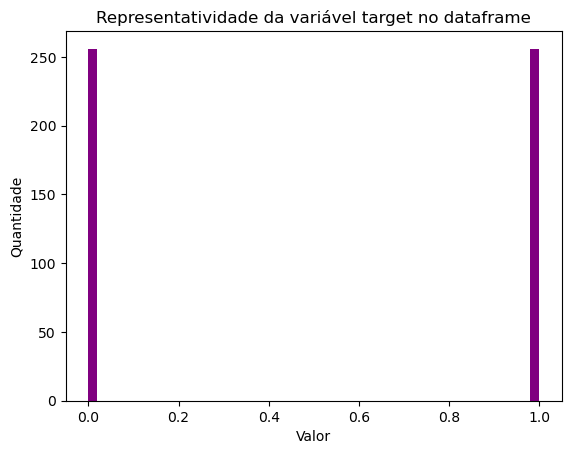

In [152]:
# Check values from database's target 
plt.figure()
plt.title("Representatividade da variável target no dataframe");
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(df_ready['damaged'].astype(int),bins = 50,color='purple');

# Modelo sem Cross validation

### Preparação dos inputs e target

In [166]:
### Setting X and y for model score:0.5545965387932191

print('Scenario is: ' + str(1))

# Setting target variable
y_new_attemp = df_ready['damaged'];
y_new_attemp = y_new_attemp.astype(int);

# Setting other variables
X_new_attemp = df_ready.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

# Separate database for test and train and 
X_train, X_test, y_train, y_test = train_test_split(X_new_attemp, y_new_attemp, test_size=0.3, shuffle=True);

#Scale df
std_scaler = StandardScaler()
X_scaled_train = X_train;
X_scaled_test = X_test;
# X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index);
# X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index);

print('X_scaled_train, y_train e X_scaled_test, y_test estão prontos.')

Scenario is: 1
X_scaled_train, y_train e X_scaled_test, y_test estão prontos.


### Treinando modelo sem otimização

In [167]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME
rf_sem_cross = RandomForestClassifier(n_estimators = 100,max_features= 1, max_depth= 17);
rf_sem_cross.fit(X_scaled_train,y_train);

### Predict df test
y_pred = rf_sem_cross.predict(X_scaled_test);
accuracy_test = accuracy_score(y_test, y_pred);
print('Preformance de previsão de df de teste: ' + "{:.4f}".format(accuracy_test))

## Predict df train (overfit)
y_pred_ss = rf_sem_cross.predict(X_scaled_train);
accuracy_train = accuracy_score(y_train, y_pred_ss);
print('Performance de previsão de df de treino: ' + "{:.4f}".format(accuracy_train))
if (accuracy_train > accuracy_test) :
    print('-> overfit(?)')

Preformance de previsão de df de teste: 1.0000
Performance de previsão de df de treino: 1.0000


In [163]:
a = (confusion_matrix(y_test, y_pred))
print(a)

[[78  2]
 [ 0 74]]


In [164]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON QUICK DATAFRAME {'n_estimators': 800, 'max_depth': 2}
### last score: 0.5761515497421756

def objective(trial):
    ### PARAMS
    # param_n_estimators = trial.suggest_int('n_estimators',100,100000,100);
    param_max_features = trial.suggest_int('max_features',1,8,1);
    param_max_depth = trial.suggest_int('max_depth',1,20,1);
    # param_min_samples_split = trial.suggest_int('min_samples_split',1,20,1);

    rf_com_cross_optuna = RandomForestClassifier(n_estimators = 100, max_features=param_max_features, max_depth=param_max_depth);
    score_new_attemp = cross_val_score(rf_com_cross_optuna, X_scaled, y_new_attemp);

    return np.mean(score_new_attemp)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

study.best_params

[I 2023-06-06 14:45:04,300] A new study created in memory with name: no-name-1911fc54-6a61-4102-8b99-b61d05afae42
[I 2023-06-06 14:45:04,793] Trial 0 finished with value: 0.9941366837997336 and parameters: {'max_features': 7, 'max_depth': 5}. Best is trial 0 with value: 0.9941366837997336.
[I 2023-06-06 14:45:05,260] Trial 1 finished with value: 0.9941366837997336 and parameters: {'max_features': 6, 'max_depth': 12}. Best is trial 0 with value: 0.9941366837997336.
[I 2023-06-06 14:45:05,675] Trial 2 finished with value: 0.996078431372549 and parameters: {'max_features': 2, 'max_depth': 3}. Best is trial 2 with value: 0.996078431372549.
[I 2023-06-06 14:45:06,117] Trial 3 finished with value: 0.9960974681134591 and parameters: {'max_features': 3, 'max_depth': 13}. Best is trial 3 with value: 0.9960974681134591.
[I 2023-06-06 14:45:06,613] Trial 4 finished with value: 0.9941366837997336 and parameters: {'max_features': 4, 'max_depth': 8}. Best is trial 3 with value: 0.9960974681134591.
[

{'max_features': 1, 'max_depth': 17}

In [165]:
optuna.visualization.plot_optimization_history(study)

# Modelo com Cross validation

### Preparação dos inputs e target

In [168]:
### Setting X and y for model

print('Scenario is: ' + str(1))

# Setting target variable
y_new_attemp = df_ready['damaged'];
y_new_attemp = y_new_attemp.astype(int);

# Setting other variables
X_new_attemp = df_ready.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

X_scaled = X_new_attemp;

print('X_scaled e y_new_attemp estão prontos.')

Scenario is: 1
X_scaled e y_new_attemp estão prontos.


### Treinando modelo sem otimização

In [169]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME
rf_com_cross = RandomForestClassifier(n_estimators = 100,max_features= 1, max_depth= 17);
score_new_attemp = cross_val_score(rf_com_cross, X_scaled, y_new_attemp);

print('Performance da media das validações cruzadas: ' + "{:.4f}".format(np.mean(score_new_attemp)))

Performance da media das validações cruzadas: 0.9980


# Modelo Validação com datasetB

## Preparando dataset B

In [96]:
pathB

['./database_raw/DatasetB\\zzzBD1.TXT',
 './database_raw/DatasetB\\zzzBD10.TXT',
 './database_raw/DatasetB\\zzzBD11.TXT',
 './database_raw/DatasetB\\zzzBD12.TXT',
 './database_raw/DatasetB\\zzzBD13.TXT',
 './database_raw/DatasetB\\zzzBD14.TXT',
 './database_raw/DatasetB\\zzzBD15.TXT',
 './database_raw/DatasetB\\zzzBD16.TXT',
 './database_raw/DatasetB\\zzzBD17.TXT',
 './database_raw/DatasetB\\zzzBD18.TXT',
 './database_raw/DatasetB\\zzzBD19.TXT',
 './database_raw/DatasetB\\zzzBD2.TXT',
 './database_raw/DatasetB\\zzzBD20.TXT',
 './database_raw/DatasetB\\zzzBD21.TXT',
 './database_raw/DatasetB\\zzzBD22.TXT',
 './database_raw/DatasetB\\zzzBD23.TXT',
 './database_raw/DatasetB\\zzzBD24.TXT',
 './database_raw/DatasetB\\zzzBD25.TXT',
 './database_raw/DatasetB\\zzzBD26.TXT',
 './database_raw/DatasetB\\zzzBD27.TXT',
 './database_raw/DatasetB\\zzzBD28.TXT',
 './database_raw/DatasetB\\zzzBD29.TXT',
 './database_raw/DatasetB\\zzzBD3.TXT',
 './database_raw/DatasetB\\zzzBD30.TXT',
 './database_raw/Da

In [170]:
path_used = pathB[22];
df_scenario = defs_.createDatabase(path_used);
df_scenario = df_scenario.astype(float);
# [index,    'Time',      'S1'  , ..., 'Scenario']
# [  0,     0.000000,   0.004954, ...,     1.0   ]
# [ ...,       ...,        ...  , ...,     ...   ]
# [ 262k,   255.9999,  -0.211089, ...,     1.0   ]
scenario = defs_.getDamageScenarioLabel(path_used);
print('Scenario is: ' + str(scenario));

sensor = 3;
sensor_label = 'S'+ str(sensor);
df_scenario_S1 = defs_.getRegressionCaracteristics(df_scenario,sensor_label,qty_coef=8);
df_scenario_S1 = df_scenario_S1.astype(float);

df_scenario_S1

Scenario is: 3


,coeff_0_S3,coeff_1_S3,coeff_2_S3,coeff_3_S3,coeff_4_S3,coeff_5_S3,coeff_6_S3,coeff_7_S3
0,-0.473992,0.251615,-0.280612,0.286289,-0.058420,0.307501,-0.468676,0.136098
1,-0.489930,0.239989,-0.338979,0.302104,-0.122001,0.359309,-0.440085,0.171135
2,-0.440592,0.267959,-0.223206,0.237637,-0.074683,0.163866,-0.544992,0.042730
3,-0.455632,0.275365,-0.258465,0.335215,-0.057221,0.369332,-0.417137,0.139216
4,-0.565896,0.213106,-0.296583,0.254738,-0.076652,0.281653,-0.415500,0.315889
...,...,...,...,...,...,...,...,...
251,-0.440226,0.280743,-0.433749,0.266159,-0.189028,0.396916,-0.410038,0.191862
252,-0.495465,0.220442,-0.349774,0.227349,-0.205475,0.185632,-0.481913,0.087256
253,-0.430710,0.265808,-0.430382,0.155174,-0.309613,0.269506,-0.436774,0.171894
254,-0.441545,0.264782,-0.310056,0.251710,-0.131355,0.267465,-0.443319,0.130840


## Modelo sem Cross validation

### Treinando modelo sem otimização

In [171]:
### Predict df test
y_pred = rf_sem_cross.predict(df_scenario_S1);
print('Probability of damage: ' + "{:.4f}".format(defs_.probabilityOfDamage(y_pred)));

Probability of damage: 1.0000


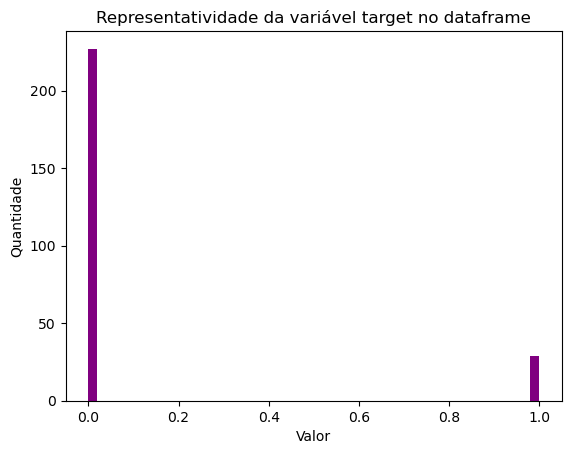

In [94]:
# Check values from database's target 
plt.figure()
plt.title("Representatividade da variável target no dataframe");
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(y_pred.astype(int),bins = 50,color='purple');

In [ ]:
a = (confusion_matrix(y_test, y_pred))
print(a)

# Final Validation models

### Create dictionary with model for each sensor

In [46]:
sensor_params_str = result_params.loc[result_params['Sensor'] == 'S'+str(sensor),'param'];


11

In [47]:
rf_models = {};
n_est = 500;
max_sampl = 0.8;

for i in tqdm(range(30)):
    sensor = i+1;
    # Creating dataframe for each sensor
    df_ready = defs_.createScaledDataframeScenario(df_final, sensor);
    # [index,  'coeff_0_S1',  ...,  'coeff_0_S7',  'damaged']
    # [  0,    -0.354953579,  ...,  -0.237141094,      1    ]
    # [ ...,        ...,      ...,      ...,          ...,  ]
    # [ 511,   -0.270663599,  ...,   0.004930247,      0    ]
    sensor_params_str = result_params.loc[result_params['Sensor'] == 'S'+str(sensor),'param'];
    sensor_params = eval(sensor_params_str[int(sensor_params_str.index[0])]);
    
    # Setting target variable
    y_new_attemp = df_ready['damaged'];
    # [index,'damaged']
    # [  0,      1    ]
    # [ ...,    ...,  ]
    # [ 511,     0    ]
    y_new_attemp = y_new_attemp.astype(int);

    # Setting other variables
    X_new_attemp = df_ready.drop(columns=['damaged']);
    # [index,  'coeff_0_S1',  ...,  'coeff_0_S7']
    # [  0,    -0.354953579,  ...,  -0.237141094]
    # [ ...,        ...,      ...,      ...,    ]
    # [ 511,   -0.270663599,  ...,   0.004930247]
    X_new_attemp = X_new_attemp.astype(float);

    # Separate database for test and train and 
    X_train, X_test, y_train, y_test = train_test_split(X_new_attemp, y_new_attemp, test_size=0.3, shuffle=True);

    #Scale df
    X_scaled_train = X_train;
    X_scaled_test = X_test;
    # std_scaler = StandardScaler()
    # X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index);
    # X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index);

    ### Create rf model for sensor
    rf = RandomForestClassifier(n_estimators = n_est, bootstrap=True, max_samples=max_sampl, max_features= sensor_params['max_features'], max_depth= sensor_params['max_depth']);
    rf.fit(X_scaled_train,y_train);

    rf_models["Sensor_S"+str(sensor)] = rf;

rf_models

  0%|          | 0/30 [00:00<?, ?it/s]

{'Sensor_S1': RandomForestClassifier(max_depth=17, max_features=1, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S2': RandomForestClassifier(max_depth=47, max_features=6, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S3': RandomForestClassifier(max_depth=28, max_features=4, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S4': RandomForestClassifier(max_depth=49, max_features=3, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S5': RandomForestClassifier(max_depth=17, max_features=2, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S6': RandomForestClassifier(max_depth=32, max_features=1, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S7': RandomForestClassifier(max_depth=50, max_features=2, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S8': RandomForestClassifier(max_depth=20, max_features=2, max_samples=0.8,
                        n_e

### Probability of damage

  0%|          | 0/31 [00:00<?, ?it/s]

Scenario is: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 10


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 11


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 12


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 13


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 14


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 16


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 17


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 18


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 19


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 2


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 20


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 21


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 22


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 23


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 24


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 25


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 26


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 27


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 28


  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\User\AppData\Local\Temp\ipykernel_1080\2406448023.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(layout='constrained')


Scenario is: 29


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 3


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 30


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 4


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 5


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 6


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 7


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 8


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 9


  0%|          | 0/30 [00:00<?, ?it/s]

Scenario is: 0


  0%|          | 0/30 [00:00<?, ?it/s]

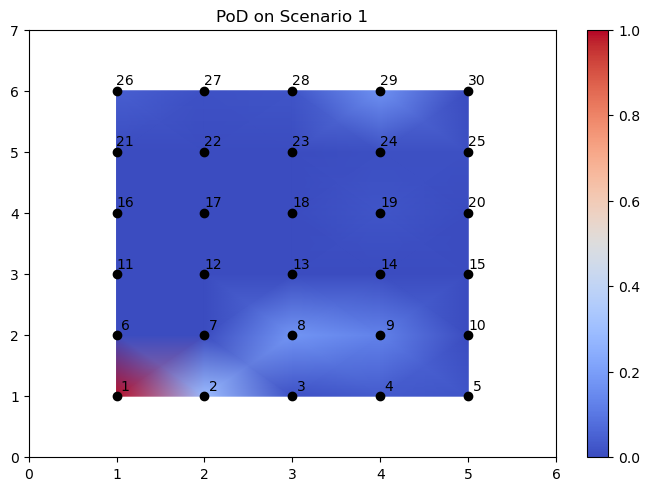

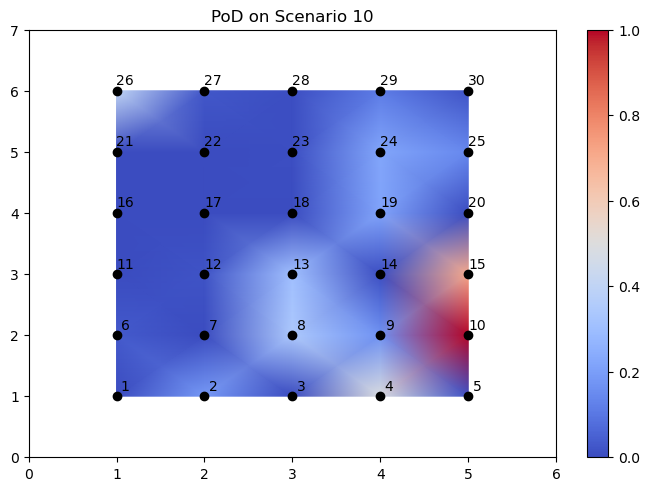

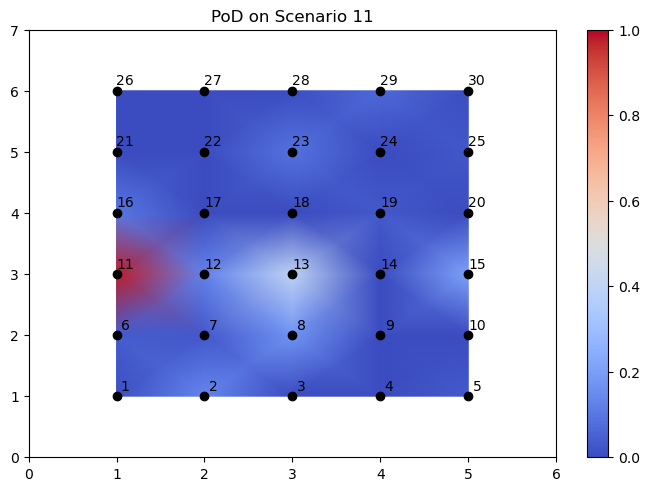

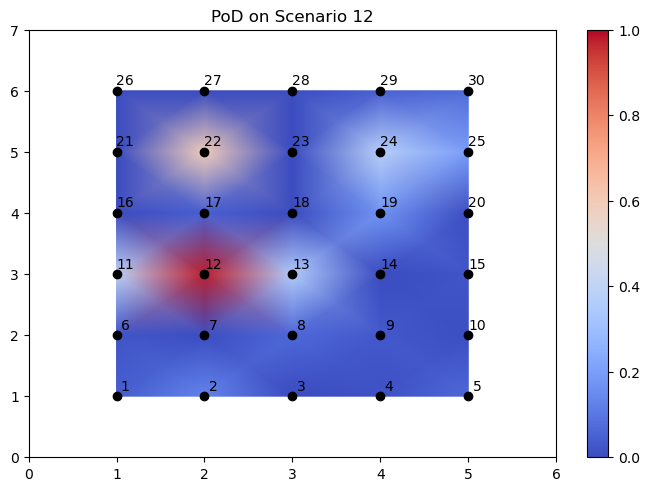

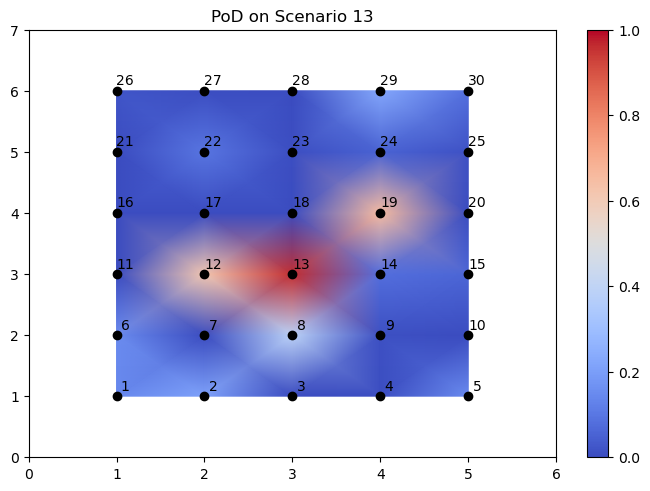

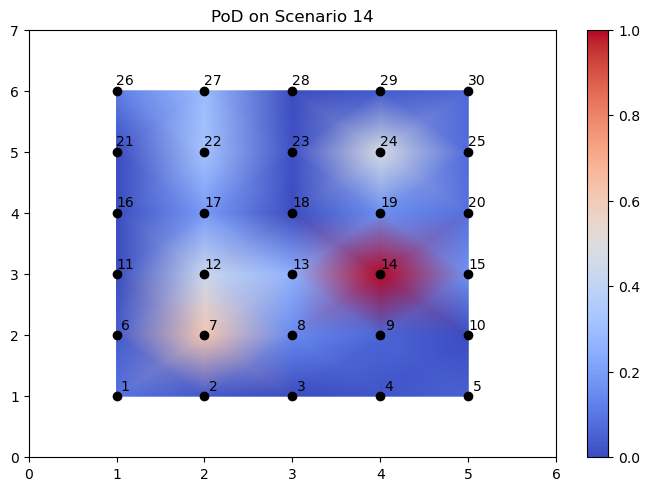

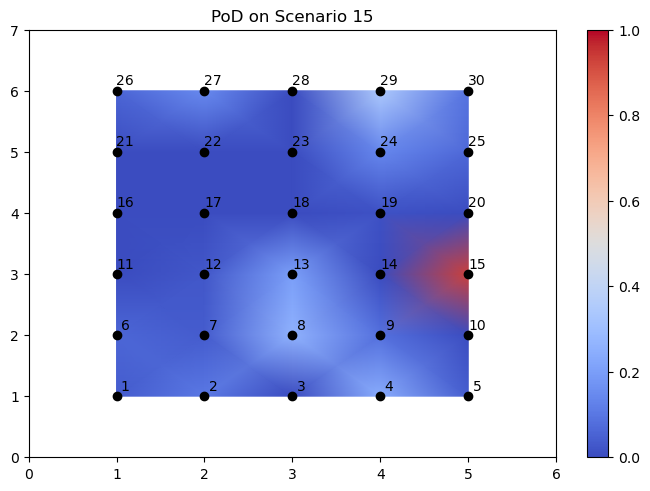

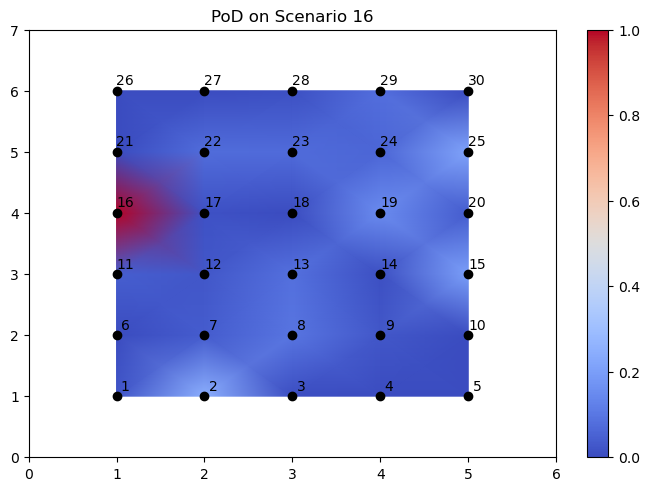

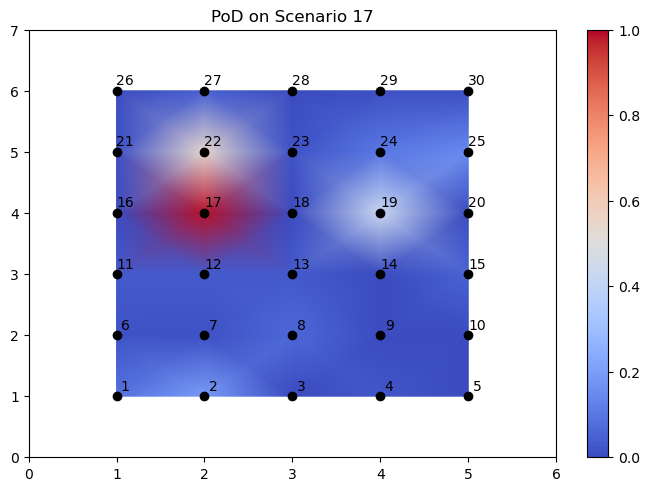

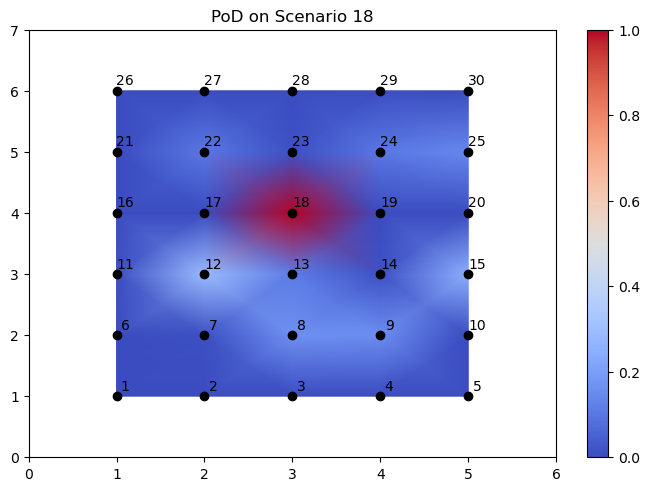

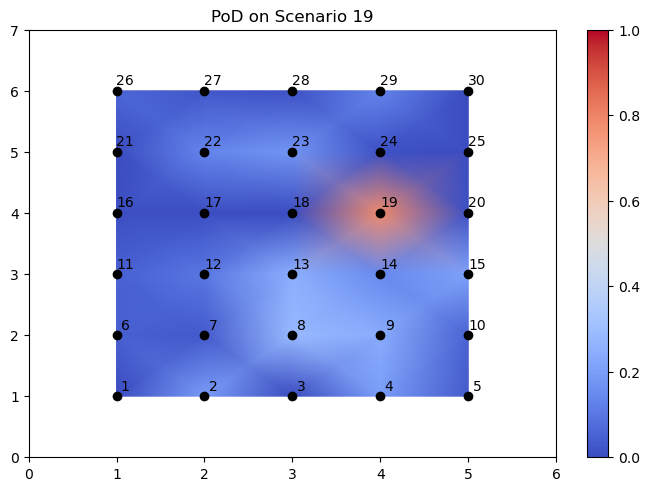

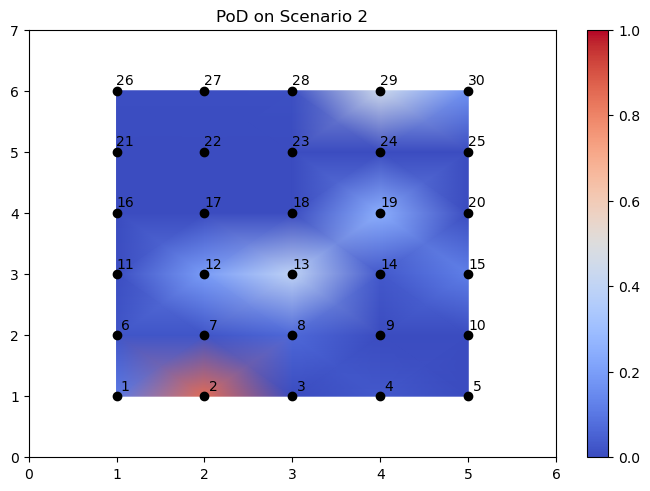

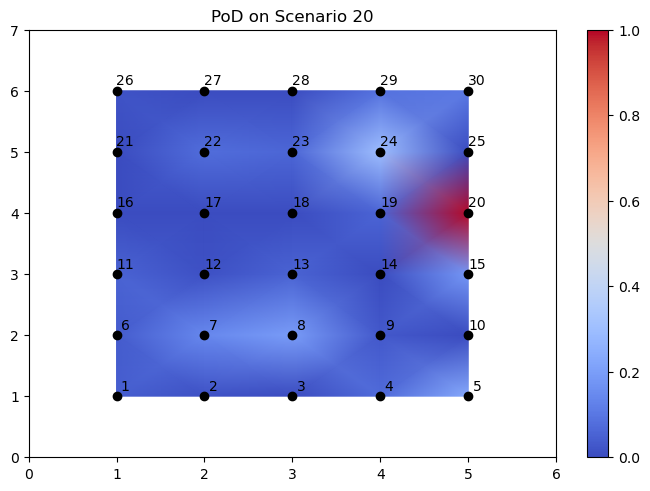

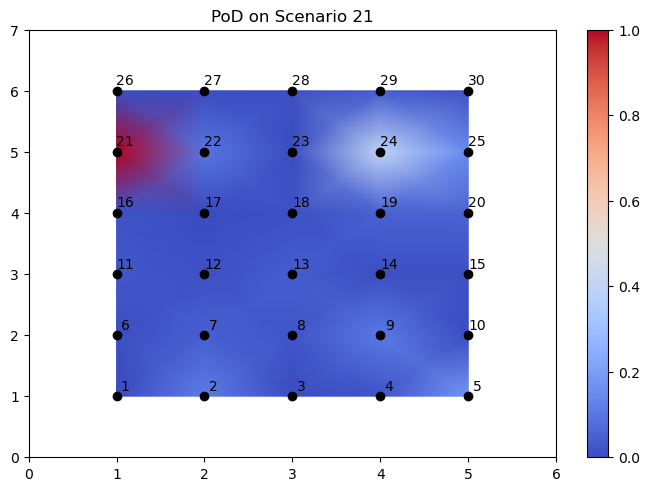

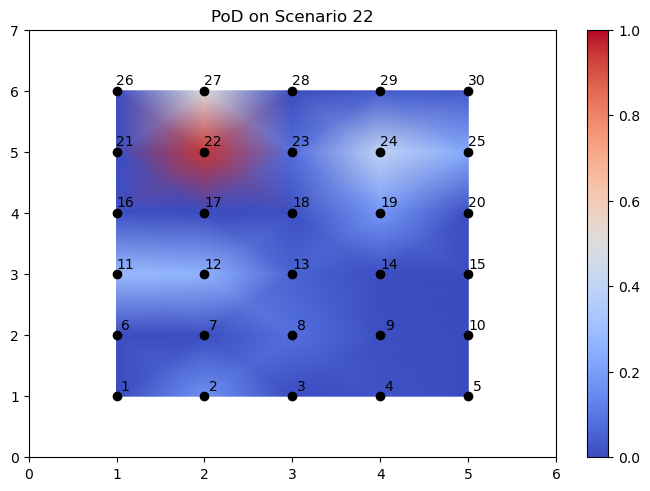

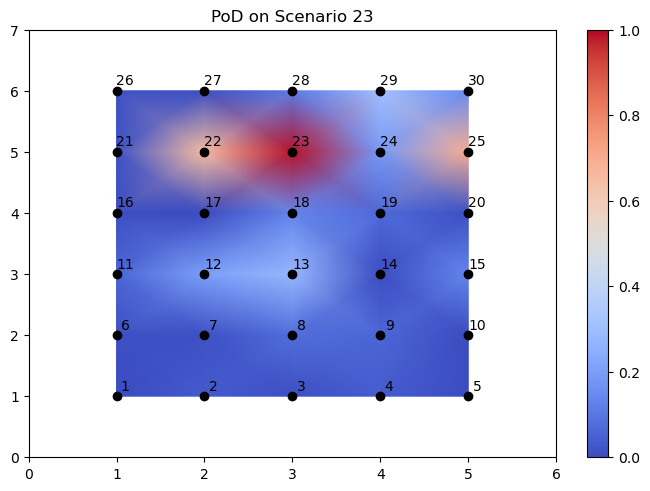

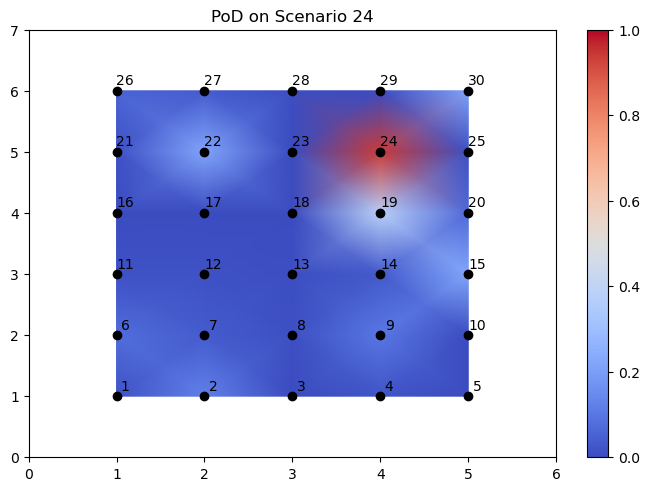

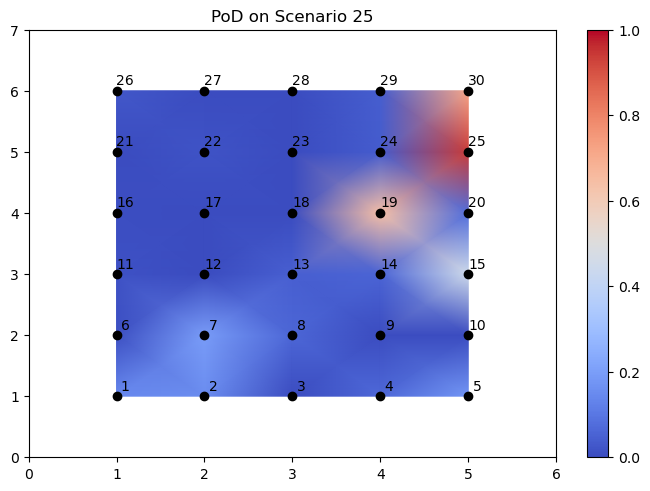

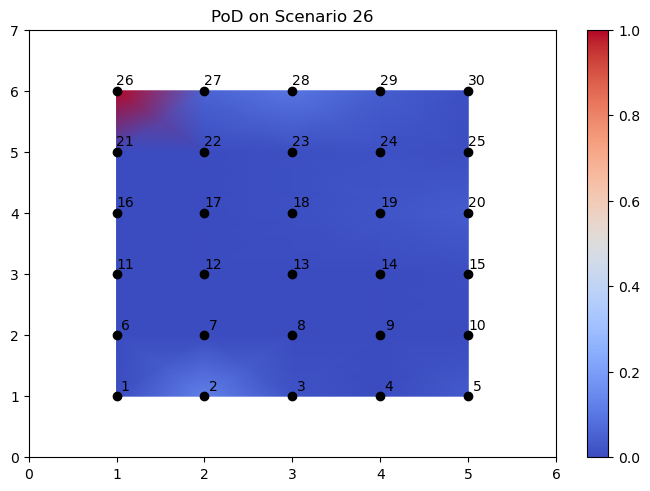

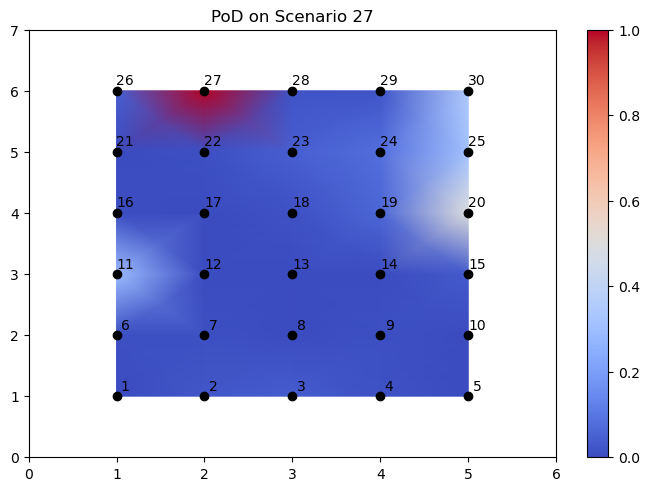

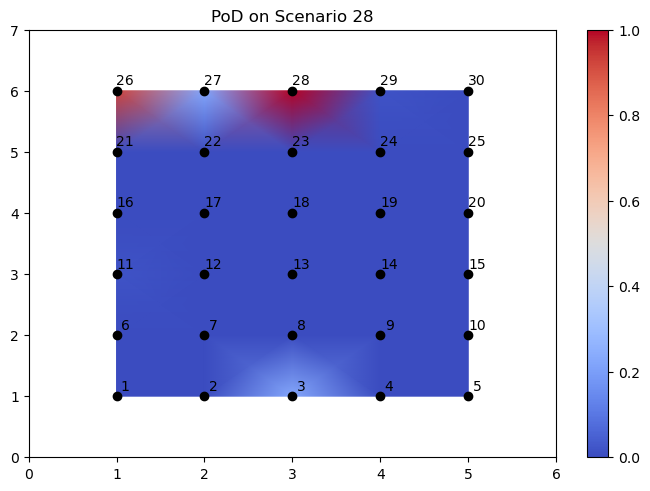

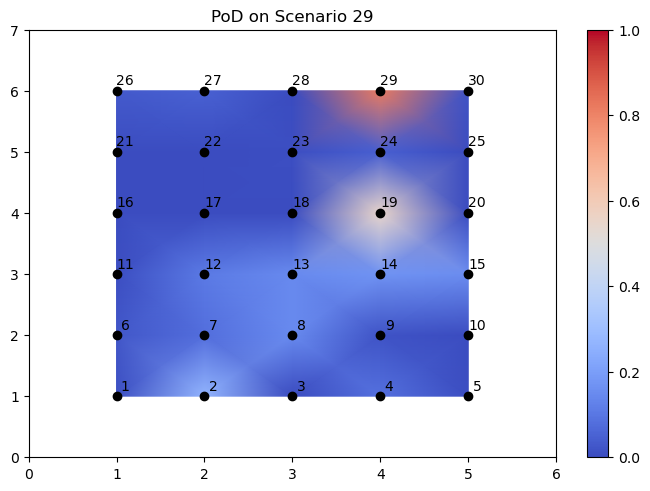

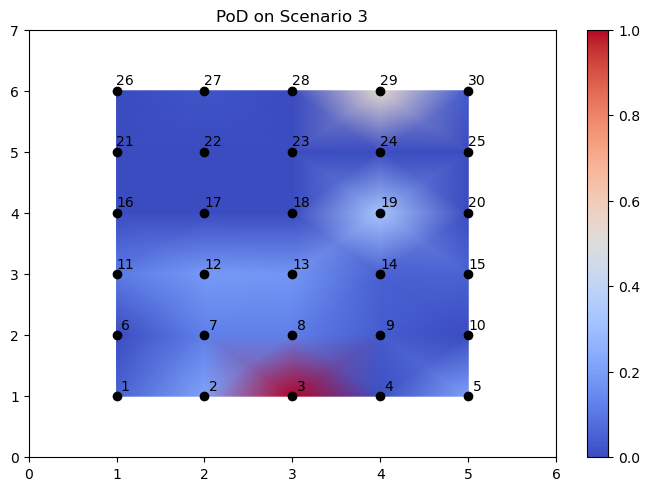

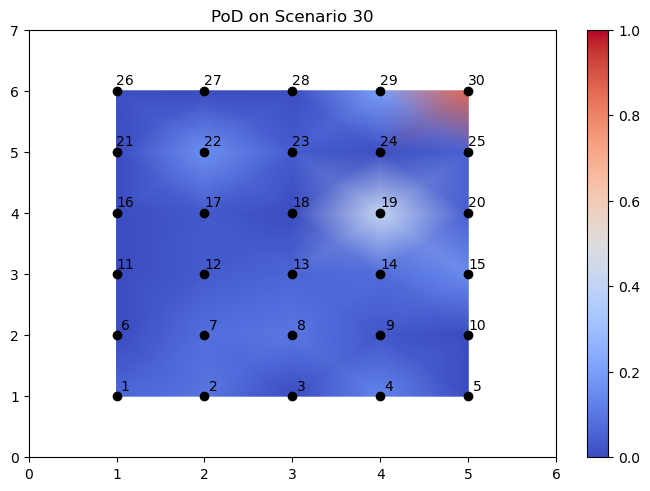

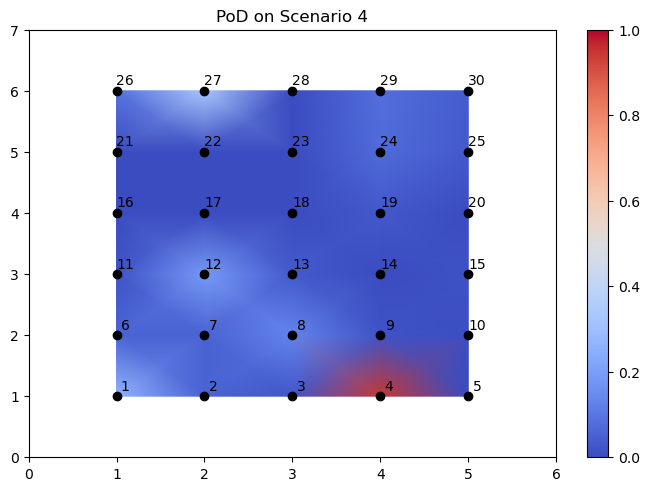

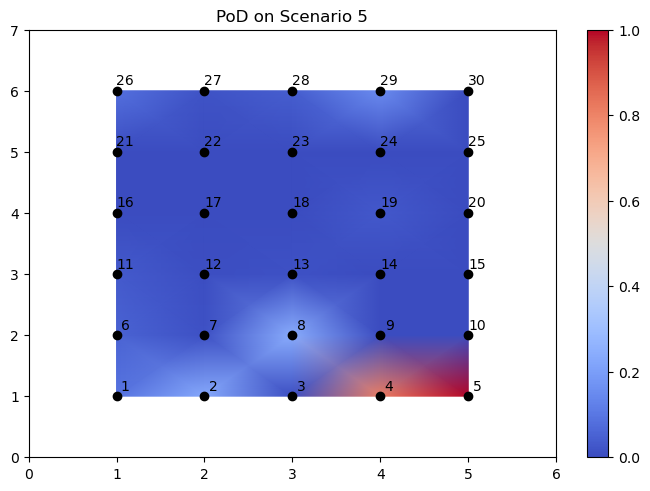

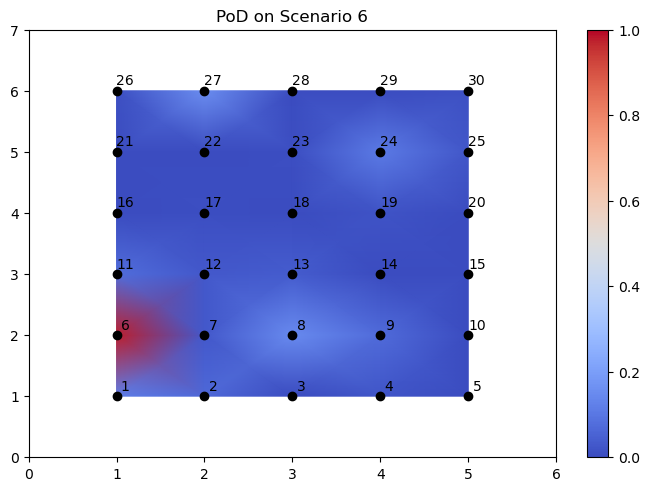

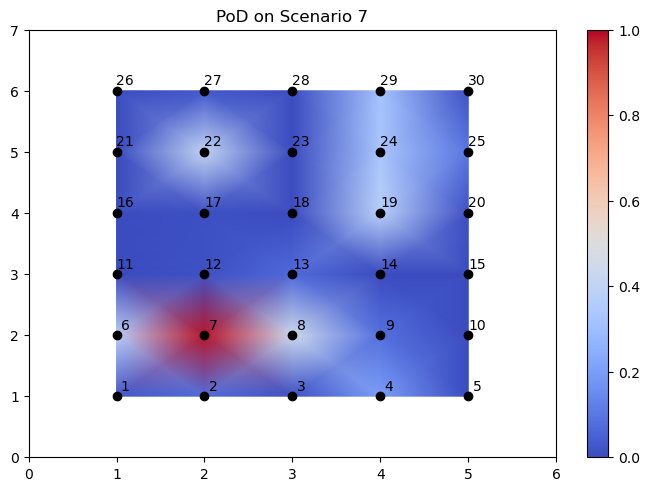

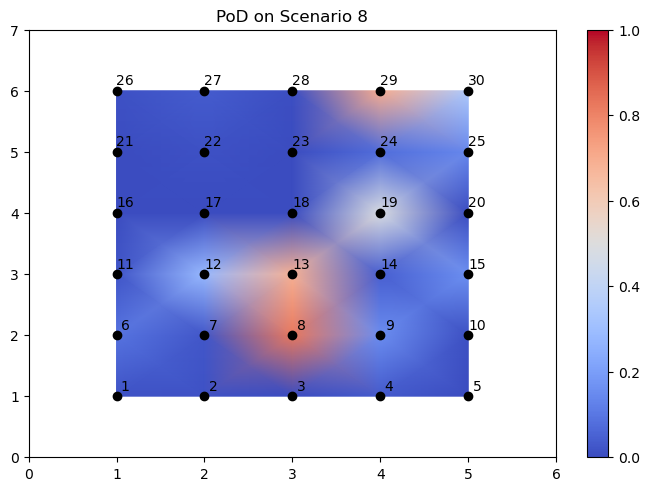

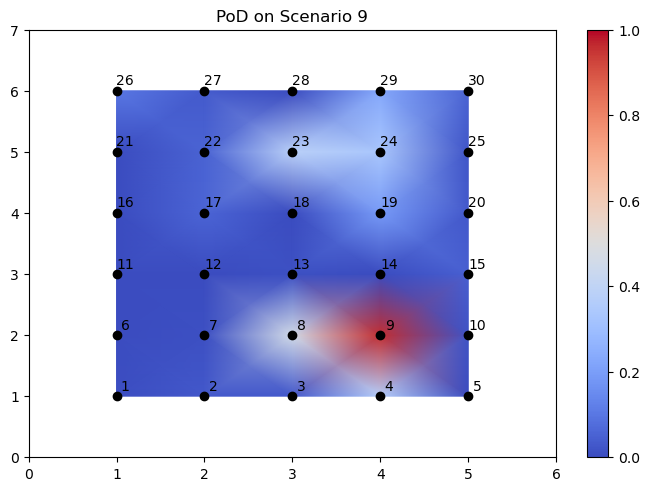

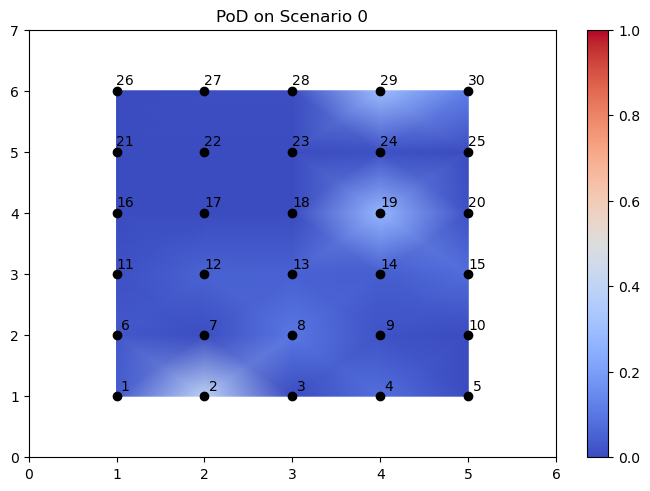

In [119]:
# path_used = pathB[0];
for path_used in tqdm(pathB):

    df_scenario = defs_.createDatabase(path_used);
    df_scenario = df_scenario.astype(float);

    # [index,    'Time',      'S1'  , ..., 'Scenario']
    # [  0,     0.000000,   0.004954, ...,     1.0   ]
    # [ ...,       ...,        ...  , ...,     ...   ]
    # [ 262k,   255.9999,  -0.211089, ...,     1.0   ]
    scenario = defs_.getDamageScenarioLabel(path_used);
    print('Scenario is: ' + str(scenario));

    pod_scenario = {};
    for i in tqdm(range(30)) :
        sensor = i+1;
        sensor_label = 'S'+ str(sensor);
        df_scenario_S1 = defs_.getRegressionCaracteristics(df_scenario,sensor_label,qty_coef=8);
        df_scenario_S1 = df_scenario_S1.astype(float);
        # [index,  'coeff_0_S1',  ...,  'coeff_0_S7']
        # [  0,    -0.354953579,  ...,  -0.237141094]
        # [ ...,        ...,      ...,      ...,    ]
        # [ 255,   -0.270663599,  ...,   0.004930247]

        X_scaled = df_scenario_S1;
        
        rf_ = rf_models["Sensor_S"+str(sensor)];

        y_pred = rf_.predict(X_scaled);
        pod_scenario["Junta_"+str(sensor)] = defs_.probabilityOfDamage(y_pred)

    def _annotate(ax, x, y, title):
        # this all gets repeated below:
        X, Y = np.meshgrid(x, y)
        ax.plot(X.flat, Y.flat, 'o', color='black')
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 7)
        ax.set_title(title)

    array_total = [];

    for i in range(6):
        array_row = [];
        for j in range(5):
            junta = (i*5)+(j+1);
            array_row.append(pod_scenario["Junta_"+str(junta)]);
        array_total.append(array_row);

    x = [1,2,3,4,5];
    y = [1,2,3,4,5,6];

    fig, ax = plt.subplots(layout='constrained')
    pos = ax.pcolormesh(x, y, array_total, cmap='coolwarm', shading='gouraud', vmin=0, vmax=1);
    # shading=gouraud;
    _annotate(ax, x, y, "PoD on Scenario " + str(scenario))

    annotations = []
    for q in range(30):
        annotations.append(str(q+1));    
    for t, label in enumerate(annotations):
        plt.annotate(label, (x[t%5] + 0.1, y[t//5] + 0.1), ha='center');
    fig.colorbar(pos, ax=ax);
    plt.savefig('pod_images/pod_scenario_'+str(scenario)+'.png');
    # plt.show()